<center><h1>DSCI-552 HW7</h1></center>
<br>


### I Chen Yang
### GitHub ID:ichenyang
### 8260207588

In [245]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

### (a) 

In [246]:
dataset = pd.read_csv('../data/Frogs_MFCCs.csv', sep = ",", header = 'infer')
train_set, test_set = train_test_split(dataset, test_size=0.3,random_state=24)
train_set

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
7141,1.0,-0.085292,0.101780,0.139571,0.084908,0.072504,0.041724,0.182466,0.145338,0.000592,...,0.018866,0.024917,0.037556,0.038570,-0.010416,-0.030000,Hylidae,Scinax,ScinaxRuber,58
1589,1.0,0.164541,0.083420,0.531550,0.167409,0.023603,-0.176244,-0.007030,0.276204,0.114335,...,0.203711,0.037311,-0.134599,-0.185808,0.061299,0.269509,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,15
3504,1.0,0.668083,0.296053,0.481094,0.212226,0.019397,-0.103887,0.046335,0.199325,0.067891,...,0.199774,0.000264,-0.100930,-0.121024,0.058107,0.214245,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,22
4604,1.0,0.044800,0.157207,0.588344,0.235148,0.038768,-0.169406,-0.047229,0.193274,0.025277,...,0.208196,-0.124745,-0.210277,-0.074102,0.191372,0.196609,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,24
568,1.0,0.459180,0.587295,0.474851,-0.185232,-0.007483,0.361223,0.022262,-0.257175,0.220895,...,0.090093,0.097835,-0.057859,-0.037824,0.075149,-0.000487,Leptodactylidae,Adenomera,AdenomeraAndre,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3473,1.0,0.147163,0.137098,0.549401,0.231500,0.091207,-0.120746,-0.048764,0.160876,0.060389,...,0.104313,-0.139369,-0.116357,-0.016016,0.151868,0.175410,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,21
343,1.0,0.625136,0.687237,0.583013,-0.137969,-0.079318,0.428873,0.093345,-0.290215,0.115262,...,0.052333,0.127297,-0.029843,0.031279,0.061858,0.020855,Leptodactylidae,Adenomera,AdenomeraAndre,8
6336,1.0,0.098824,0.320253,0.331377,0.199089,0.223720,0.074226,-0.138664,-0.014837,0.061864,...,0.130946,0.011257,-0.031166,-0.001012,-0.035284,0.012796,Hylidae,Hypsiboas,HypsiboasCordobae,42
899,1.0,0.016435,0.164486,0.509692,0.199591,0.240967,-0.009479,-0.170251,0.240374,0.387740,...,-0.287074,-0.001423,0.142126,-0.072530,-0.131682,-0.014587,Dendrobatidae,Ameerega,Ameeregatrivittata,11


### (b) i , ii

In [247]:
# Data Define
from sklearn.svm import SVC

family_train = train_set['Family']
genus_train = train_set['Genus'] 
species_train = train_set['Species'] 
features_train = train_set.iloc[:,0:22] 

family_test = test_set['Family'] 
genus_test = test_set['Genus'] 
species_test = test_set['Species'] 
features_test = test_set.iloc[:,0:22] 

In [248]:
# Model : SVM with Gaussian Kernel
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

C_range = np.logspace(-3, 6, num=10) 
gamma_range = np.linspace(0.1, 4, 40) 

params = {'estimator__gamma':gamma_range, 'estimator__C':C_range}
svm = OneVsRestClassifier(SVC(kernel='rbf', tol=0.1))
Grid_Model = GridSearchCV(svm, param_grid=params, cv=KFold(10))

In [249]:
# 1. Family

Family_svm = Grid_Model.fit(features_train, family_train)
Family_Params = Family_svm.best_params_
Family_C = Family_Params['estimator__C']
Family_Gamma = Family_Params['estimator__gamma']
Family_BestWidth = round(1/np.sqrt(2*Family_Gamma), 3)
print('Best SVM Penalty:', Family_C)
print('Best Width of Gaussian Kernel:', Family_BestWidth)



Best SVM Penalty: 100.0
Best Width of Gaussian Kernel: 0.378


In [250]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score


Family_predTest = Family_svm.predict(features_test)
Family_Score = accuracy_score(Family_predTest, family_test)
Family_Loss = round(1-Family_Score, 3)

Family_HammingLoss = hamming_loss(Family_predTest, family_test)
#familyHammingLoss = round(familyHammingLoss, 3)

print('Exact Match Loss:', Family_Loss)
print('Hamming Loss:', Family_HammingLoss)


Exact Match Loss: 0.007
Hamming Loss: 0.007410838351088467


In [251]:
# 2. Genus

Genus_svm = Grid_Model.fit(features_train, genus_train)
Genus_Params = Genus_svm.best_params_
Genus_C = Genus_Params['estimator__C']
Genus_Gamma = Genus_Params['estimator__gamma']
Genus_BestWidth = round(1/np.sqrt(2*Genus_Gamma), 3)
print('Best SVM Penalty:', Genus_C)
print('Best Width of Gaussian Kernel:', Genus_BestWidth)
Genus_predTest = Genus_svm.predict(features_test)
Genus_Score = accuracy_score(Genus_predTest, genus_test)
Genus_Loss = round(1-Genus_Score, 3)

Genus_HammingLoss = hamming_loss(Genus_predTest, genus_test)

print('Exact Match Loss:', Genus_Loss)
print('Hamming Loss:', Genus_HammingLoss)

Best SVM Penalty: 10.0
Best Width of Gaussian Kernel: 0.43
Exact Match Loss: 0.01
Hamming Loss: 0.009726725335803613


In [252]:
# 3. Species
Species_svm = Grid_Model.fit(features_train, species_train)
Species_Params = Species_svm.best_params_
Species_C = Species_Params['estimator__C']
Species_Gamma = Species_Params['estimator__gamma']
Species_BestWidth = round(1/np.sqrt(2*Species_Gamma), 3)
print('Best SVM Penalty:', Species_C)
print('Best Width of Gaussian Kernel:', Species_BestWidth)
Species_predTest = Species_svm.predict(features_test)
Species_Score = accuracy_score(Species_predTest, species_test)
Species_Loss = round(1-Species_Score, 3)

Species_HammingLoss = hamming_loss(Species_predTest, species_test)

print('Exact Match Loss:', Species_Loss)
print('Hamming Loss:', Species_HammingLoss)

Best SVM Penalty: 100.0
Best Width of Gaussian Kernel: 0.477
Exact Match Loss: 0.01
Hamming Loss: 0.010189902732746642


Result : Different features have similar result. Best penality is 100, best width is around 0.45 and hamming Loss is 0.008.

### (b) iii

In [253]:
# Scale
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler()
dataX = dataset[featureNames]

scaler = scaler.fit(dataX)

trainDataX = train_set[featureNames]
#trainDataY = train_set[labels]
testDataX = test_set[featureNames]
#testDataY = test_set[labels]

scaledTrainDataX = scaler.transform(trainDataX)
scaledTestDataX = scaler.transform(testDataX)


In [254]:
# Model : SVM with L1
from sklearn.svm import LinearSVC

l1SVMModel = LinearSVC(penalty='l1', dual=False)
l1Parameters = {'C':C_range}
l1GridModel = GridSearchCV(l1SVMModel, l1Parameters, cv=KFold(10))

In [255]:
# Family

familyL1SVMModel = l1GridModel.fit(scaledTrainDataX, family_train)

familyL1BestParams = familyL1SVMModel.best_params_
familyL1BestC = familyL1BestParams['C']


L1PredictedTestFamily = familyL1SVMModel.predict(scaledTestDataX)
L1ExactFamilyScore = accuracy_score(L1PredictedTestFamily, family_test)
L1ExactFamilyLoss = round(1-L1ExactFamilyScore, 3)

L1FamilyHammingLoss = hamming_loss(L1PredictedTestFamily, family_test)

print('Best SVM Penalty:', familyL1BestC)
print('Exact Match Loss:', L1ExactFamilyLoss)
print('Hamming Loss:', L1FamilyHammingLoss)



/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

Best SVM Penalty: 10.0
Exact Match Loss: 0.058
Hamming Loss: 0.058360352014821676


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [256]:
# Genus

genusL1SVMModel = l1GridModel.fit(scaledTrainDataX, genus_train)

genusL1BestParams = genusL1SVMModel.best_params_
genusL1BestC = genusL1BestParams['C']


L1PredictedTestgenus = genusL1SVMModel.predict(scaledTestDataX)
L1ExactgenusScore = accuracy_score(L1PredictedTestgenus, genus_test)
L1ExactgenusLoss = round(1-L1ExactgenusScore, 3)

L1genusHammingLoss = hamming_loss(L1PredictedTestgenus, genus_test)

print('Best SVM Penalty:', genusL1BestC)
print('Exact Match Loss:', L1ExactgenusLoss)
print('Hamming Loss:', L1genusHammingLoss)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

Best SVM Penalty: 100.0
Exact Match Loss: 0.045
Hamming Loss: 0.04539138490041686


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [257]:
# 3. Species

speciesL1SVMModel = l1GridModel.fit(scaledTrainDataX, species_train)

speciesL1BestParams = speciesL1SVMModel.best_params_
speciesL1BestC = speciesL1BestParams['C']


L1PredictedTestspecies = speciesL1SVMModel.predict(scaledTestDataX)
L1ExactspeciesScore = accuracy_score(L1PredictedTestspecies, species_test)
L1ExactspeciesLoss = round(1-L1ExactspeciesScore, 3)

L1speciesHammingLoss = hamming_loss(L1PredictedTestspecies, species_test)

print('Best SVM Penalty:', speciesL1BestC)
print('Exact Match Loss:', L1ExactspeciesLoss)
print('Hamming Loss:', L1speciesHammingLoss)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

Best SVM Penalty: 100.0
Exact Match Loss: 0.037
Hamming Loss: 0.037054191755442334


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Result : L1-penalized SVMs have different results with Gaussian kernels SVMs. Compared to Gaussian kernels SVMs L1, SVMs have smaller penalty and hamming loss. Moreover, each feature has different results. In these results, feature of "Family" has largest Penalty and  Hamming loss

### (b) iv

In [258]:
smote = SMOTE(random_state=24, sampling_strategy = 'all')
familyTrainDataX, familyTrainDataY = smote.fit_sample(trainDataX, trainDataY['Family'])
genusTrainDataX, genusTrainDataY = smote.fit_sample(trainDataX, trainDataY['Genus'])
speciesTrainDataX, speciesTrainDataY = smote.fit_sample(trainDataX, trainDataY['Species'])

l1SmoteSVMModel = LinearSVC(penalty='l1', loss='squared_hinge', dual=False, C=C1, multi_class='ovr')
l1SmoteParameters = {'C':C_range}
l1SmoteGridModel = GridSearchCV(l1SmoteSVMModel, l1SmoteParameters, cv=KFold(10))


In [259]:
# Family
L1SmoteSVMModel = l1SmoteGridModel.fit(familyTrainDataX, familyTrainDataY)

L1SmoteBestParams = L1SmoteSVMModel.best_params_
L1SmoteBestC = L1SmoteBestParams['C']


L1SmotePredictedTest = L1SmoteSVMModel.predict(testDataX)
L1SmoteExactScore = accuracy_score(L1SmotePredictedTest, family_test)
L1SmoteExactLoss = round(1-L1SmoteExactScore, 3)
L1SmoteHammingLoss = hamming_loss(L1SmotePredictedTest, family_test)

print('Best SVM Penalty:', L1SmoteBestC)
print('Exact Match Loss:', L1SmoteExactLoss)
print('Hamming Loss:', L1SmoteHammingLoss)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

Best SVM Penalty: 1000000.0
Exact Match Loss: 0.069
Hamming Loss: 0.06901343214451135


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [260]:
# genus
L1SmoteSVMModel = l1SmoteGridModel.fit(genusTrainDataX, genusTrainDataY)

L1SmoteBestParams = L1SmoteSVMModel.best_params_
L1SmoteBestC = L1SmoteBestParams['C']


L1SmotePredictedTest = L1SmoteSVMModel.predict(testDataX)
L1SmoteExactScore = accuracy_score(L1SmotePredictedTest, genus_test)
L1SmoteExactLoss = round(1-L1SmoteExactScore, 3)
L1SmoteHammingLoss = hamming_loss(L1SmotePredictedTest, genus_test)

print('Best SVM Penalty:', L1SmoteBestC)
print('Exact Match Loss:', L1SmoteExactLoss)
print('Hamming Loss:', L1SmoteHammingLoss)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

Best SVM Penalty: 10000.0
Exact Match Loss: 0.08
Hamming Loss: 0.07966651227420102


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [261]:
# Species
L1SmoteSVMModel = l1SmoteGridModel.fit(speciesTrainDataX, speciesTrainDataY)

L1SmoteBestParams = L1SmoteSVMModel.best_params_
L1SmoteBestC = L1SmoteBestParams['C']


L1SmotePredictedTest = L1SmoteSVMModel.predict(testDataX)
L1SmoteExactScore = accuracy_score(L1SmotePredictedTest, species_test)
L1SmoteExactLoss = round(1-L1SmoteExactScore, 3)
L1SmoteHammingLoss = hamming_loss(L1SmotePredictedTest, species_test)

print('Best SVM Penalty:', L1SmoteBestC)
print('Exact Match Loss:', L1SmoteExactLoss)
print('Hamming Loss:', L1SmoteHammingLoss)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

Best SVM Penalty: 1000.0
Exact Match Loss: 0.044
Hamming Loss: 0.0444650301065308


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Based on the result of (b) ii, iii and iv, we can find that the SVM with Gaussian kernel algorithm achieves the lowest Exact Match loss and the lowest Hamming Loss compared to the other two algorithms. This is happening since this algorithm creates nonlinear decision boundaries among the classes and the data are not fully linearly separable.

However, the other two algorithms achieved good scores. The SMOTE approach required a lot of computational power in order to apply the 10-fold CV approach for 100 values of the regularization parameter C.

## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set Monte-Carlo Simulation:

### 2. (a)

In [262]:
iterativeBestCluster = {}
for iteration in range(1, 51):
    silhouetteScoreDict = {}
    for k in range(2, 51):
        kMeansModel = KMeans(n_clusters=k)
        kMeansModel = kMeansModel.fit(dataX)
        clusterIndex = kMeansModel.labels_
        silhouetteScore = silhouette_score(dataX, clusterIndex)
        silhouetteScoreDict[k] = silhouetteScore

    sortedScores = sorted(silhouetteScoreDict.items(), key=operator.itemgetter(1), reverse=True)
    bestCluster = sortedScores[0][0]
    iterativeBestCluster[iteration] = bestCluster
    print("Interation:",iteration,",Best Cluster:",bestCluster)

Interation: 1 ,Best Cluster: 4
Interation: 2 ,Best Cluster: 4
Interation: 3 ,Best Cluster: 4
Interation: 4 ,Best Cluster: 4
Interation: 5 ,Best Cluster: 4
Interation: 6 ,Best Cluster: 4
Interation: 7 ,Best Cluster: 4
Interation: 8 ,Best Cluster: 4
Interation: 9 ,Best Cluster: 4
Interation: 10 ,Best Cluster: 4
Interation: 11 ,Best Cluster: 4
Interation: 12 ,Best Cluster: 4
Interation: 13 ,Best Cluster: 4
Interation: 14 ,Best Cluster: 4
Interation: 15 ,Best Cluster: 4
Interation: 16 ,Best Cluster: 4
Interation: 17 ,Best Cluster: 4
Interation: 18 ,Best Cluster: 4
Interation: 19 ,Best Cluster: 4
Interation: 20 ,Best Cluster: 4
Interation: 21 ,Best Cluster: 4
Interation: 22 ,Best Cluster: 4
Interation: 23 ,Best Cluster: 4
Interation: 24 ,Best Cluster: 4
Interation: 25 ,Best Cluster: 4
Interation: 26 ,Best Cluster: 4
Interation: 27 ,Best Cluster: 4
Interation: 28 ,Best Cluster: 4
Interation: 29 ,Best Cluster: 4
Interation: 30 ,Best Cluster: 4
Interation: 31 ,Best Cluster: 4
Interation: 32 ,B

### 2. (b) 

In [273]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,calinski_harabasz_score
X=dataset.iloc[:,:-4]
scalar=StandardScaler()
X_=pd.DataFrame(scalar.fit_transform(X),columns=X.columns)

best_k=[]
hamming_distances=[]
hamming_loss_a=[]
hamming_score_a=[]
hamming_distances_std=[]
hamming_loss_std=[]
hamming_score_std=[]


for i in range(1,51):
    print ("\nIteration : ",i)
    si_scores=[]
    for  k in  range (2,51):
        k_means=KMeans(n_clusters=k)
        k_means.fit(X_)
        labels=k_means.labels_
        si_scores.append(silhouette_score(X_,labels,metric='euclidean'))
    
    nn=(si_scores.index(max(si_scores)))+2
    best_k.append(nn)
    k_means=KMeans(n_clusters=nn)
    k_means.fit(X_)
    labels=pd.DataFrame({'label':list(k_means.labels_)})
    new_dataset=pd.concat([dataset.iloc[:,:-1],labels],axis=1)
    grouped=new_dataset.groupby('label')
  #  print ("\nIdeal k : ",nn)
    H_loss=[]
    H_score=[]
    H_d=[]
    for j in range(nn):
        y_T=pd.DataFrame(columns=['Family','Genus','Species'])
        y_pred=pd.DataFrame(columns=['Family','Genus','Species'])
        group=grouped.get_group(j)
        y_T=y_T.append(group.iloc[:,-4:-1])
        family=group['Family']. value_counts(). idxmax()
        genus=group['Genus']. value_counts(). idxmax()
        species=group['Species']. value_counts(). idxmax()
        temp=pd.DataFrame({'Family':[family]*len(group),'Genus':[genus]*len(group),
                              'Species':[species]*len(group)})
        y_pred=y_pred.append(temp)
        label=(family,genus,species)
        print ("Cluster : ",j)
        print ("Labels : ",label)
        hamming_losses=[]
      
        for col in range(len(y_T.columns)):
            hamming_losses.append(hamming_loss(y_T.iloc[:,col],y_pred.iloc[:,col]))
            
        hamming_loss_=np.mean(hamming_losses)
        H_loss.append(hamming_loss_)
        H_score.append(1-hamming_loss_)
        H_d.append(hamming_loss_*3)
    
    avg_hdistance=np.mean(H_d)    
    avg_hloss=np.mean(H_loss)
    avg_hscore=np.mean(H_score)
    
    std_hdistance=np.std(H_d)
    std_hloss=np.std(H_loss)
    std_hscore=np.std(H_score)
    
    
    print ("Average Hamming Distance : ",avg_hdistance)
    print ("Average Hamming Loss : ",avg_hloss)
    print ("Average Hamming Score : ",avg_hscore)
    print ("Standard deviation of Hamming Distance : ",std_hdistance)
    print ("Standard deviation of Hamming Loss : ",std_hloss)
    print ("Standard deviation of Hamming Score : ",std_hscore)
    hamming_distances.append(avg_hdistance)
    hamming_loss_a.append(avg_hloss)
    hamming_score_a.append(avg_hscore)
    hamming_distances_std.append(std_hdistance)
    hamming_loss_std.append(std_hloss)
    hamming_score_std.append(std_hscore)





Iteration :  1
Cluster :  0
Labels :  ('Hylidae', 'Hypsiboas', 'HypsiboasCinerascens')
Cluster :  1
Labels :  ('Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus')
Cluster :  2
Labels :  ('Hylidae', 'Hypsiboas', 'HypsiboasCordobae')
Average Hamming Distance :  0.796550179316443
Average Hamming Loss :  0.26551672643881435
Average Hamming Score :  0.7344832735611857
Standard deviation of Hamming Distance :  0.7416460584083264
Standard deviation of Hamming Loss :  0.24721535280277546
Standard deviation of Hamming Score :  0.24721535280277546

Iteration :  2
Cluster :  0
Labels :  ('Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus')
Cluster :  1
Labels :  ('Hylidae', 'Hypsiboas', 'HypsiboasCinerascens')
Cluster :  2
Labels :  ('Hylidae', 'Hypsiboas', 'HypsiboasCordobae')
Average Hamming Distance :  0.796550179316443
Average Hamming Loss :  0.26551672643881435
Average Hamming Score :  0.7344832735611857
Standard deviation of Hamming Distance :  0.7416460584083264
Standard deviat

Cluster :  0
Labels :  ('Hylidae', 'Hypsiboas', 'HypsiboasCinerascens')
Cluster :  1
Labels :  ('Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus')
Cluster :  2
Labels :  ('Hylidae', 'Hypsiboas', 'HypsiboasCordobae')
Average Hamming Distance :  0.796550179316443
Average Hamming Loss :  0.26551672643881435
Average Hamming Score :  0.7344832735611857
Standard deviation of Hamming Distance :  0.7416460584083264
Standard deviation of Hamming Loss :  0.24721535280277546
Standard deviation of Hamming Score :  0.24721535280277546

Iteration :  17
Cluster :  0
Labels :  ('Hylidae', 'Hypsiboas', 'HypsiboasCinerascens')
Cluster :  1
Labels :  ('Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus')
Cluster :  2
Labels :  ('Hylidae', 'Hypsiboas', 'HypsiboasCordobae')
Average Hamming Distance :  0.7973414021999279
Average Hamming Loss :  0.26578046739997596
Average Hamming Score :  0.734219532600024
Standard deviation of Hamming Distance :  0.7412672279665256
Standard deviation of Hamming 

Cluster :  0
Labels :  ('Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus')
Cluster :  1
Labels :  ('Hylidae', 'Hypsiboas', 'HypsiboasCordobae')
Cluster :  2
Labels :  ('Hylidae', 'Hypsiboas', 'HypsiboasCinerascens')
Average Hamming Distance :  0.7973414021999279
Average Hamming Loss :  0.2657804673999759
Average Hamming Score :  0.734219532600024
Standard deviation of Hamming Distance :  0.7412672279665256
Standard deviation of Hamming Loss :  0.24708907598884186
Standard deviation of Hamming Score :  0.24708907598884186

Iteration :  32
Cluster :  0
Labels :  ('Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus')
Cluster :  1
Labels :  ('Hylidae', 'Hypsiboas', 'HypsiboasCinerascens')
Cluster :  2
Labels :  ('Hylidae', 'Hypsiboas', 'HypsiboasCordobae')
Average Hamming Distance :  0.796550179316443
Average Hamming Loss :  0.26551672643881435
Average Hamming Score :  0.7344832735611857
Standard deviation of Hamming Distance :  0.7416460584083264
Standard deviation of Hamming L

Cluster :  0
Labels :  ('Hylidae', 'Hypsiboas', 'HypsiboasCordobae')
Cluster :  1
Labels :  ('Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus')
Cluster :  2
Labels :  ('Hylidae', 'Hypsiboas', 'HypsiboasCinerascens')
Average Hamming Distance :  0.7973414021999279
Average Hamming Loss :  0.2657804673999759
Average Hamming Score :  0.734219532600024
Standard deviation of Hamming Distance :  0.7412672279665256
Standard deviation of Hamming Loss :  0.24708907598884186
Standard deviation of Hamming Score :  0.24708907598884186

Iteration :  47
Cluster :  0
Labels :  ('Hylidae', 'Hypsiboas', 'HypsiboasCinerascens')
Cluster :  1
Labels :  ('Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus')
Cluster :  2
Labels :  ('Hylidae', 'Hypsiboas', 'HypsiboasCordobae')
Average Hamming Distance :  0.796550179316443
Average Hamming Loss :  0.26551672643881435
Average Hamming Score :  0.7344832735611857
Standard deviation of Hamming Distance :  0.7416460584083264
Standard deviation of Hamming L

### 2. (c) 

In [274]:
print ("Average of 50 Hamming distances : ",np.mean(hamming_distances))
print ("Average of 50 Hamming score : ",np.mean(hamming_score_a))
print ("Average of 50 Hamming loss : ",np.mean(hamming_loss_a))
print ("Standard deviation of 50 Hamming distances : ",np.mean(hamming_distances_std))
print ("Standard deviation of 50 Hamming score : ",np.mean(hamming_score_std))
print ("Standard deviation of 50 Hamming loss : ",np.mean(hamming_loss_std))

Average of 50 Hamming distances :  0.8231657354501181
Average of 50 Hamming score :  0.7256114215166275
Average of 50 Hamming loss :  0.2743885784833727
Standard deviation of 50 Hamming distances :  0.7265766692515875
Standard deviation of 50 Hamming score :  0.24219222308386246
Standard deviation of 50 Hamming loss :  0.24219222308386246


## 3.

### ISLR 12.6.2





### (a)

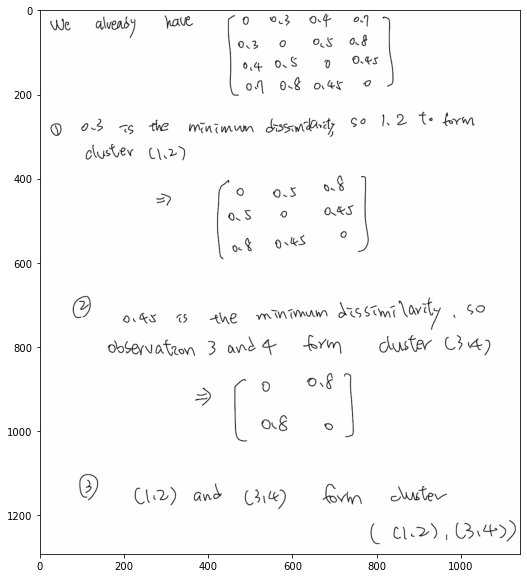

In [265]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
img = mpimg.imread('../data/ISLR12_6_2.png')
imgplot = plt.imshow(img)
plt.show()

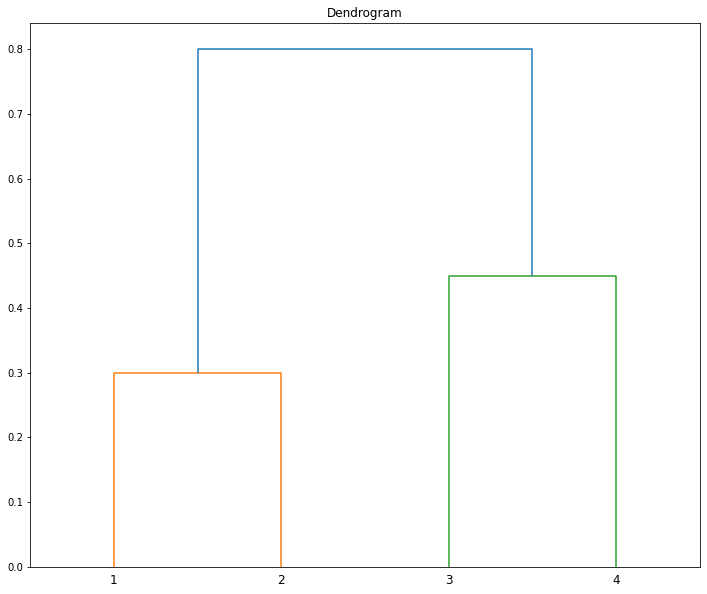

In [266]:
dis_mat = np.array([[0.0, 0.3, 0.4, 0.7], [0.3, 0.0, 0.5, 0.8], [0.4, 0.5, 0.0, 0.45], [0.7, 0.8, 0.45, 0.0]])
dists = squareform(dis_mat)
linkage_matrix = linkage(dists, "complete")
dendrogram(linkage_matrix, labels=["1", "2", "3", "4"])
plt.title("Dendrogram")
plt.show()

### (b)

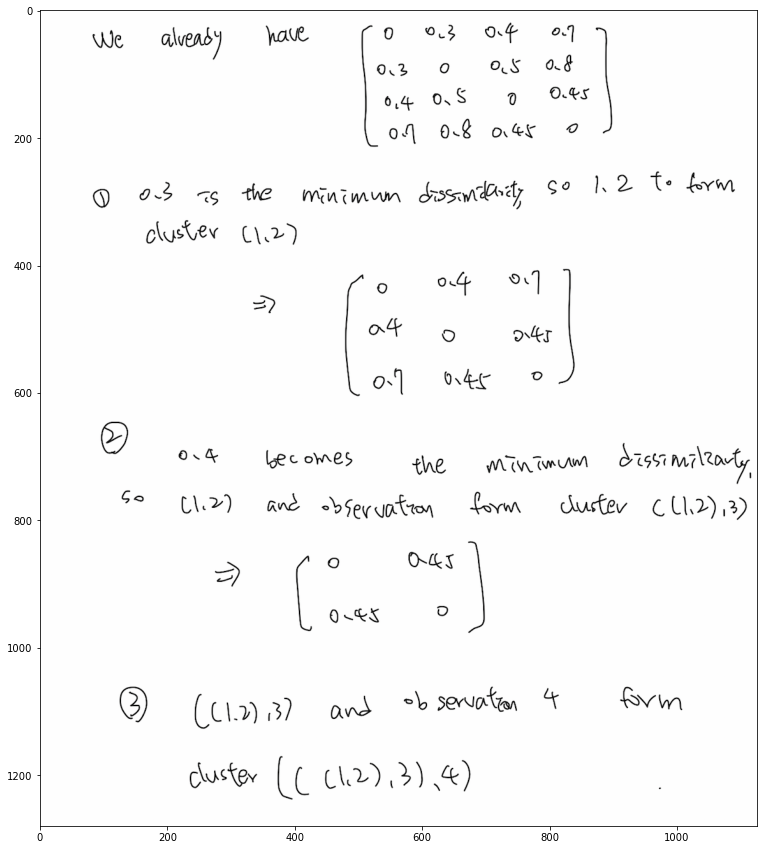

In [267]:
figure(figsize=(15, 15))
img = mpimg.imread('../data/ISLR12_6_2-b.png')
imgplot = plt.imshow(img)
plt.show()

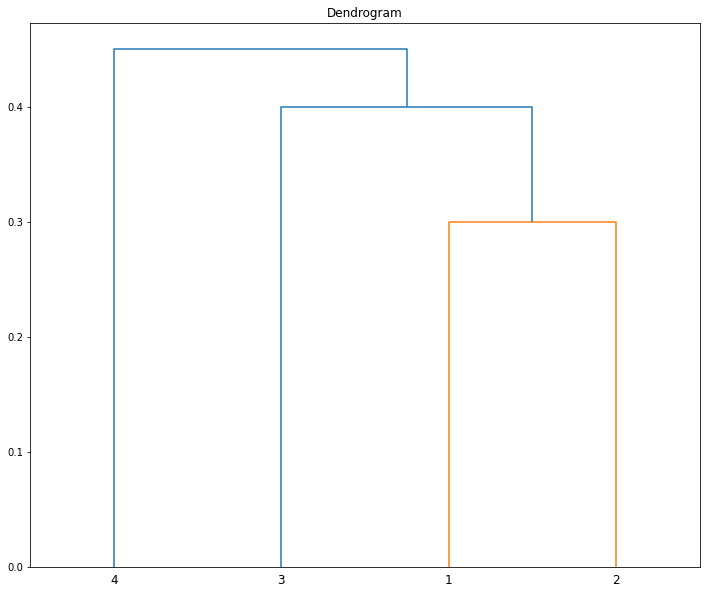

In [268]:
linkage_matrix = linkage(dists, "single")
dendrogram(linkage_matrix, labels=["1", "2", "3", "4"])
plt.title("Dendrogram")
plt.show()

### (c)

##### Ans: Observations 1 and 2 are in Cluster A and 3 and 4 in Cluster B.

### (d)

##### Ans: Observations 1, 2 and 3 are in Cluster A and 4 in Cluster B.

### (e)

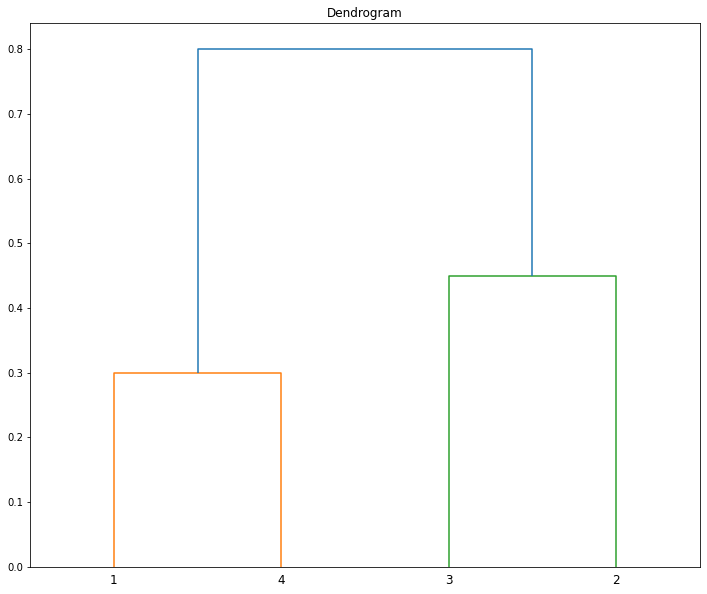

In [269]:
dis_mat = np.array([[0.0, 0.3, 0.4, 0.7], [0.3, 0.0, 0.5, 0.8], [0.4, 0.5, 0.0, 0.45], [0.7, 0.8, 0.45, 0.0]])
dists = squareform(dis_mat)
linkage_matrix = linkage(dists, "complete")
dendrogram(linkage_matrix, labels=["1", "4", "3", "2"])
plt.title("Dendrogram")
plt.show()

### Reference

https://rpubs.com/evertonjlima/245990
https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
